<a href="https://colab.research.google.com/github/Tom-Jung/Suanlab_example/blob/main/_5_%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0(Support_Vector_Machines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [154]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [155]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes, load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [197]:
X, y = load_boston(return_X_y=True)
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.2177283706374875
평가 데이터 점수 : 0.13544178468518187


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### SVM을 사용한 분류 모델 (SVC)

In [198]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.9014084507042254
평가 데이터 점수 : 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [158]:
X, y=load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(linear_svr.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(linear_svr.score(X_test,y_test)))

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train, y_train)

print("Polynomial SVR 학습 데이터 점수 : {}".format(polynomial_svr.score(X_train,y_train)))
print("Polynomial SVR 평가 데이터 점수 : {}".format(polynomial_svr.score(X_test,y_test)))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print(" RBF SVR 학습 데이터 점수 : {}".format(rbf_svr.score(X_train,y_train)))
print("RBF SVR  평가 데이터 점수 : {}".format(rbf_svr.score(X_test,y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

학습 데이터 점수 : 0.715506620496448
평가 데이터 점수 : 0.6380398541506058
Polynomial SVR 학습 데이터 점수 : 0.2024454261446289
Polynomial SVR 평가 데이터 점수 : 0.133668450367462
 RBF SVR 학습 데이터 점수 : 0.2177283706374875
RBF SVR  평가 데이터 점수 : 0.13544178468518187


In [159]:
X, y=load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print("학습 데이터 점수 : {}".format(linear_svc.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(linear_svc.score(X_test,y_test)))

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수 : {}".format(polynomial_svc.score(X_train,y_train)))
print("Polynomial SVC 평가 데이터 점수 : {}".format(polynomial_svc.score(X_test,y_test)))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print(" RBF SVC 학습 데이터 점수 : {}".format(rbf_svc.score(X_train,y_train)))
print("RBF SVC  평가 데이터 점수 : {}".format(rbf_svc.score(X_test,y_test)))

학습 데이터 점수 : 0.960093896713615
평가 데이터 점수 : 0.986013986013986
Polynomial SVC 학습 데이터 점수 : 0.9014084507042254
Polynomial SVC 평가 데이터 점수 : 0.9230769230769231
 RBF SVC 학습 데이터 점수 : 0.9014084507042254
RBF SVC  평가 데이터 점수 : 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [160]:
X, y=load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

In [161]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, degree={}, C={}, gamma={}".format(2, 0.1, 'auto'))
print("Polynomial SVC 학습 데이터 점수 : {}".format(polynomial_svc.score(X_train,y_train)))
print("Polynomial SVC 평가 데이터 점수 : {}".format(polynomial_svc.score(X_test,y_test)))

kernel=poly, degree=2, C=0.1, gamma=auto
Polynomial SVC 학습 데이터 점수 : 0.9835680751173709
Polynomial SVC 평가 데이터 점수 : 0.993006993006993


In [162]:
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kernel=rbf, C={}, gamma={}".format(2.0, 'scale'))
print("RBF SVC 학습 데이터 점수 : {}".format(rbf_svc.score(X_train,y_train)))
print("RBF SVC 평가 데이터 점수 : {}".format(rbf_svc.score(X_test,y_test)))

kernel=rbf, C=2.0, gamma=scale
RBF SVC 학습 데이터 점수 : 0.9154929577464789
RBF SVC 평가 데이터 점수 : 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [163]:
X, y=load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

In [164]:
model = SVC()
model.fit(X_train, y_train)

print(" SVC 학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print(" SVC  평가 데이터 점수 : {}".format(model.score(X_test,y_test)))

 SVC 학습 데이터 점수 : 0.9014084507042254
 SVC  평가 데이터 점수 : 0.9230769230769231


In [165]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
model = SVC()
model.fit(X_train, y_train)

print(" SVC 학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print(" SVC  평가 데이터 점수 : {}".format(model.score(X_test,y_test)))

 SVC 학습 데이터 점수 : 0.9835680751173709
 SVC  평가 데이터 점수 : 0.986013986013986


In [167]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
model = SVC()
model.fit(X_train, y_train)

print(" SVC 학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print(" SVC  평가 데이터 점수 : {}".format(model.score(X_test,y_test)))

 SVC 학습 데이터 점수 : 0.9812206572769953
 SVC  평가 데이터 점수 : 0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [169]:
X, y=load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [170]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [172]:
print(" 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print(" 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

 학습 데이터 점수 : 0.7302121151690131
 평가 데이터 점수 : 0.6430284938767392


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


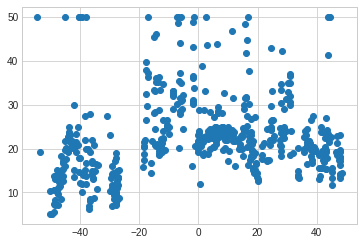

In [173]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

In [174]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

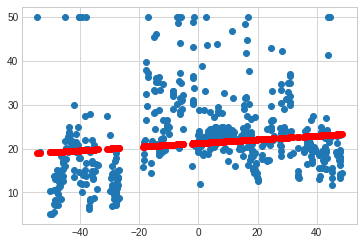

In [175]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color='r')

In [176]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.03611207, 0.02662015, 0.02546549, 0.02502823, 0.01587009]),
 'score_time': array([0.00321937, 0.00309658, 0.00349617, 0.00323439, 0.0019033 ]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [177]:
pipe = Pipeline([('sacler', StandardScaler()),
                      ('model', SVR(kernel='linear'))])

param_grid =[{'model__gamma' : ['scale','auto'],
                  'model__C' : [1.0,0.1,0.01],
                  'model__epsilon' : [1.0,0.1,0.01]}]

gs =GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sacler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [178]:
gs.best_estimator_

Pipeline(steps=[('sacler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 당뇨병

In [179]:
X, y=load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [180]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [182]:
print(" 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print(" 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

 학습 데이터 점수 : 0.49114294887489485
 평가 데이터 점수 : 0.5235043246427685


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


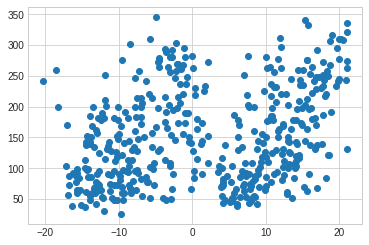

In [183]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

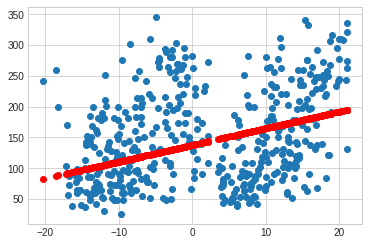

In [184]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color='r')

In [185]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(
    estimator=estimator,
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.027426  , 0.01734328, 0.01206326, 0.01246762, 0.00985122]),
 'score_time': array([0.00289035, 0.00288129, 0.00240827, 0.00252581, 0.00148916]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [186]:
pipe = Pipeline([('sacler', StandardScaler()),
                      ('model', SVR(kernel='linear'))])

param_grid =[{'model__gamma' : ['scale','auto'],
                  'model__C' : [1.0,0.1,0.01],
                  'model__epsilon' : [1.0,0.1,0.01]}]

gs =GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sacler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [187]:
gs.best_estimator_

Pipeline(steps=[('sacler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 보스턴 주택 가격

In [203]:
X, y=load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [204]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [206]:
print(" 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print(" 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

 학습 데이터 점수 : 0.6936492025103855
 평가 데이터 점수 : 0.631145656056062


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


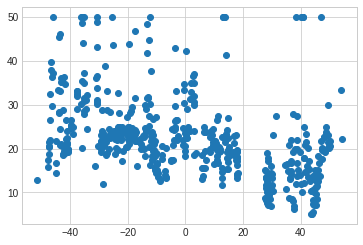

In [207]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

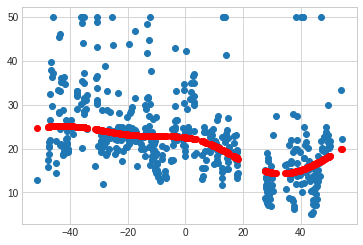

In [208]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color='r')

In [209]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.0221653 , 0.02489972, 0.0220027 , 0.02170396, 0.01836205]),
 'score_time': array([0.00587535, 0.00621057, 0.00602508, 0.00587916, 0.00361419]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [210]:
pipe = Pipeline([('sacler', StandardScaler()),
                      ('model', SVR(kernel='rbf'))])

param_grid =[{'model__kernel' : ['rbf','polynomial','sigmoid']}]

gs =GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sacler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [211]:
gs.best_estimator_

Pipeline(steps=[('sacler', StandardScaler()), ('model', SVR())])

In [213]:
pipe = Pipeline([('sacler', StandardScaler()),
                      ('model', SVR(kernel='rbf'))])

param_grid =[{'model__gamma' : ['scale','auto'],
              'model__C' : [1.0,0.1,0.01],
              'model__epsilon' : [1.0,0.1,0.01]}]

gs =GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sacler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [214]:
gs.best_estimator_

Pipeline(steps=[('sacler', StandardScaler()), ('model', SVR(epsilon=0.01))])

### 당뇨병

In [216]:
X, y=load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [217]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [219]:
print(" 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print(" 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

 학습 데이터 점수 : 0.17858834767301313
 평가 데이터 점수 : 0.20638104596918672


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


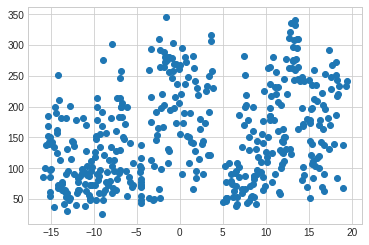

In [220]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

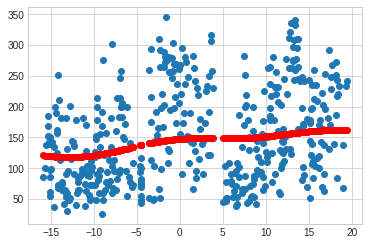

In [221]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color='r')

In [222]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

cross_validate(
    estimator=estimator,
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02363086, 0.02153826, 0.0147984 , 0.01422048, 0.0095706 ]),
 'score_time': array([0.00461936, 0.00455785, 0.00464416, 0.00474501, 0.00259423]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [225]:
pipe = Pipeline([('sacler', StandardScaler()),
                      ('model', SVR(kernel='rbf'))])

param_grid =[{'model__kernel' : ['rbf','polynomial','sigmoid']}]

gs =GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sacler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [226]:
gs.best_estimator_

Pipeline(steps=[('sacler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [227]:
pipe = Pipeline([('sacler', StandardScaler()),
                      ('model', SVR(kernel='sigmoid'))])

param_grid =[{'model__gamma' : ['scale','auto'],
              'model__C' : [1.0,0.1,0.01],
              'model__epsilon' : [1.0,0.1,0.01]}]

gs =GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sacler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [228]:
gs.best_estimator_

Pipeline(steps=[('sacler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [229]:
model =gs.best_estimator_
model.fit(X_train,y_train)

Pipeline(steps=[('sacler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [230]:
print(" 학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print(" 평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

 학습 데이터 점수 : 0.37373924790621293
 평가 데이터 점수 : 0.3990426970635933


## Linear SVC

### 유방암

### 붓꽃

### 와인

## Kernel SVC

### 유방암

### 붓꽃

### 와인